In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(sys.version)

3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]


In [2]:
#!pip install signatory==1.2.6.1.8.1
import torch
import signatory
 

In [ ]:
1.2.1.1.3.1, 1.2.1.1.4.0, 1.2.1.1.5.0, 1.2.2.1.2.0, 1.2.2.1.3.0, 1.2.2.1.3.1, 1.2.2.1.4.0, 1.2.2.1.5.0, 1.2.2.1.5.1, 1.2.3.1.2.0, 1.2.3.1.3.0, 1.2.3.1.3.1, 1.2.3.1.4.0, 1.2.3.1.5.0, 1.2.3.1.5.1, 1.2.3.1.6.0, 1.2.4.1.6.0, 1.2.4.1.7.0, 1.2.4.1.7.1, 1.2.6.1.6.0, 1.2.6.1.7.0, 1.2.6.1.7.1, 1.2.6.1.8.0, 1.2.6.1.8.1

In [3]:
sig = torch.load('sig.pt')
sig.shape

torch.Size([452, 72])

In [18]:
sig.shape
#sig

torch.Size([452, 72])

In [4]:
x = signatory.invert_signature(sig,72, 1, 1400)

In [5]:
x.shape
x = (np.array(np.squeeze(x)))
x1 = x[69]
x1

array([1400.    , 1405.0239, 1410.0479, 1415.0718, 1420.0957, 1425.1196,
       1430.1436, 1435.1675, 1440.1914, 1445.2153, 1450.2393, 1455.2632,
       1460.2871, 1465.311 , 1470.335 , 1475.3589, 1480.3828, 1485.4067,
       1490.4307, 1495.4546, 1500.4785, 1505.5024, 1510.5264, 1515.5503,
       1520.5742, 1525.5981, 1530.6221, 1535.646 , 1540.6699, 1545.6938,
       1550.7178, 1555.7417, 1560.7656, 1565.7896, 1570.8135, 1575.8374,
       1580.8613, 1585.8853, 1590.9092, 1595.9331, 1600.957 , 1605.981 ,
       1611.0049, 1616.0288, 1621.0527, 1626.0767, 1631.1006, 1636.1245,
       1641.1484, 1646.1724, 1651.1963, 1656.2202, 1661.2441, 1666.2681,
       1671.292 , 1676.3159, 1681.3398, 1686.3638, 1691.3877, 1696.4116,
       1701.4355, 1706.4595, 1711.4834, 1716.5073, 1721.5312, 1726.5552,
       1731.5791, 1736.603 , 1741.627 , 1746.6509, 1751.6748, 1756.6987,
       1761.7227], dtype=float32)

In [17]:
temp = real[::,0]
temp.shape

torch.Size([452, 2])

In [26]:
real_inverted = signatory.invert_signature(temp,2,1, 1400)
real_inverted.shape

torch.Size([452, 3, 1])

(452, 3, 1)
(1356,)


<AxesSubplot:>

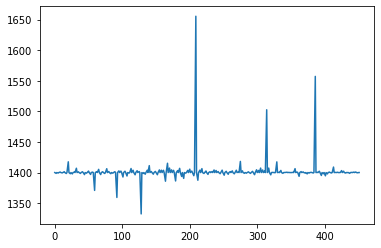

In [46]:
real_arr = (np.array(real_inverted))
print(real_arr.shape)
real_arr = real_arr.flatten()
print(real_arr.shape)
real_series = pd.Series(real_arr)
real_series[:452].plot()

In [51]:
import pickle

def load_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [213]:
x_real = load_pickle('x_real.torch')
x_fake = load_pickle('x_fake.torch')


In [214]:
x_real.shape, x_fake.shape


(torch.Size([2260, 6, 2]), torch.Size([1, 8000, 2]))

<AxesSubplot:>

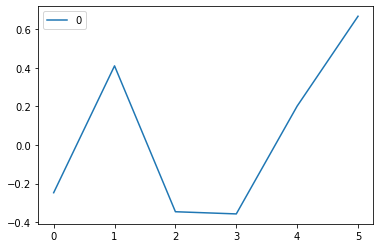

In [234]:
real_array = np.array(x_real[:,:,0][0])
real_df = pd.DataFrame(real_array)
real_df[:1].plot()
#fake_df.to_csv('fake.csv')

#np.array(x_fake).shape


<AxesSubplot:>

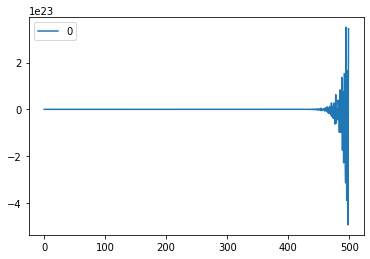

In [238]:
fake_array = np.array(x_fake[:,:,0][0])
fake_df = pd.DataFrame(fake_array)
fake_df[:500].plot()
#fake_df.to_csv('fake.csv')

#np.array(x_fake).shape


In [165]:
x_real_arr = np.array(x_real)
df1 = pd.DataFrame()
df1['price'] = 1462.420044
df1['open_rtn'] = pd.Series(x_real_arr[:,:,0][:,0])
df1['price'] = 1462.420044


In [211]:
rets = list()
for x in fake_df[0]:
    if x > 0:
        rets.append(np.exp(x))
    else:
        rets.append(np.exp(x)*-1)
rets

[-0.44613859326879873,
 -0.322296506350448,
 2.285606661348479,
 1.532468757537599,
 -0.8904731629247801,
 1.1311333655603029,
 1.2225660063831547,
 1.0471463065121387,
 1.1140262094305142,
 -0.9978939226575996,
 1.114568240925809,
 1.0382876833881998,
 -0.8715859977273057,
 1.0471849224705936,
 -0.8689965830958349,
 1.1499411350547057,
 -0.9313273205248782,
 1.0020791866724807,
 1.112455818228837,
 1.1042682147752112,
 -0.9746893086986418,
 -0.8695145702499987,
 -0.9782610439359176,
 -0.9377099669626254,
 1.1381805170294697,
 -0.9862823032755395,
 1.117728642258808,
 1.0981161935698343,
 1.0319182497410988,
 -0.7393294378390227,
 -0.958681490880633,
 1.1633717663951666,
 1.1137193871382682,
 -0.8375091391278021,
 1.0984959919834691,
 1.0916561277770744,
 1.063328329944946,
 -0.8721994640686391,
 -0.9339834789943051,
 1.0836736766734234,
 -0.9525547440419705,
 -0.80006540372231,
 1.1936029920854225,
 1.1060853889770457,
 -0.8850326217124219,
 1.1449575275841766,
 1.0444944204028386,
 1

In [195]:
np.exp(2.5)

12.182493960703473

In [204]:
rets

[0      -0.446139
 1      -0.322297
 2      -2.285607
 3      -1.532469
 4      -0.890473
           ...   
 7995   -1.086190
 7996   -0.837596
 7997   -1.118931
 7998   -0.966438
 7999   -1.067621
 Name: 0, Length: 8000, dtype: float32]

In [132]:
c = (np.array(og_pre)).flatten()
price = c[:2266] 
se = pd.Series(price)
se

0      -0.247161
1       0.233621
2       0.410351
3      -0.263192
4      -0.345697
          ...   
2261    0.314662
2262    0.095739
2263   -0.345241
2264    0.169258
2265   -2.735186
Length: 2266, dtype: float32

In [131]:
df = pd.read_csv('SP500_2013_2021_daily.csv')

inverse_log = np.exp(price)


pd.Series(inverse_log)

0       0.781015
1       1.263166
2       1.507347
3       0.768594
4       0.707727
          ...   
2261    1.369797
2262    1.100471
2263    0.708050
2264    1.184425
2265    0.064882
Length: 2266, dtype: float32

ValueError: channels and depth do not correspond to signature shape.